# Visualization of temperature dependent functions
Temperature dependent fuctions from the paper *"Thermal biology of mosquito-borne disease"* ([Mordecai et al. 2019](https://onlinelibrary.wiley.com/doi/full/10.1111/ele.13335)).

## Setup

In [1]:
# Loading packages and their components
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# briere function: q*T*[T-Tmin]*[Tmax-T]^(1/2)
def briere_function(q, T, Tmin, Tmax):
    return (q*T*(T-Tmin)*(Tmax-T)**(1/2))

# quadratic function: -q*[T-Tmin]*[T-Tmax]^(1/2)
def quadratic_function(q, T, Tmin, Tmax):
    return (-q*(T-Tmin)*(T-Tmax))

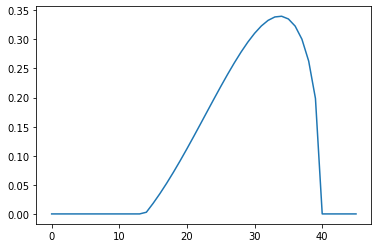

In [3]:
# get the biting rate for T from 0°C to 45°C for plotting
biting_rate=[]
for i in range(0, 46):
    x = briere_function(q=(2.02*(10**(-4))), T=i, Tmin=13.8, Tmax=40.0)
    biting_rate.append(x)
# replace negative values with 0
biting_rate = pd.Series(biting_rate)
biting_rate = biting_rate.clip(lower=0)
# plot 
plt.plot(biting_rate);

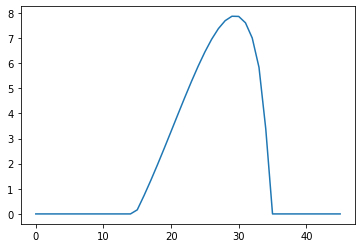

In [4]:
# get the fecundity for T from 0°C to 45°C for plotting
fecundity =[]
for i in range(0, 46):
    x = briere_function(q=(8.16*(10**(-3))), T=i, Tmin=14.7, Tmax=34.4)
    fecundity.append(x)
# replace negative values with 0
fecundity = pd.Series(fecundity)
fecundity = fecundity.clip(lower=0)
# plot
plt.plot(fecundity);

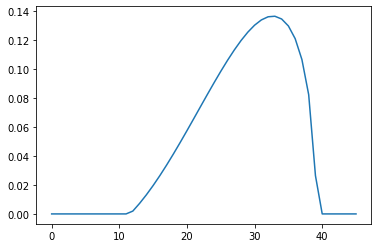

In [5]:
# get the Mosquito Dev. Rate (MDR) for T from 0°C to 45°C for plotting
mdr =[]
for i in range(0, 46):
    x = briere_function(q=(7.83*(10**(-5))), T=i, Tmin=11.6, Tmax=39.1)
    mdr.append(x)
# replace negative values with 0
mdr = pd.Series(mdr)
mdr = mdr.clip(lower=0)
# plot
plt.plot(mdr);

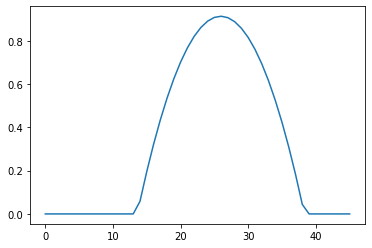

In [6]:
# get the immature survival for T from 0°C to 45°C for plotting
immature_survival =[]
for i in range(0, 46):
    x = quadratic_function(q=(5.99*(10**(-3))), T=i, Tmin=13.6, Tmax=38.3)
    immature_survival.append(x)
# replace negative values with 0
immature_survival = pd.Series(immature_survival)
immature_survival = immature_survival.clip(lower=0)
# plot
plt.plot(immature_survival);

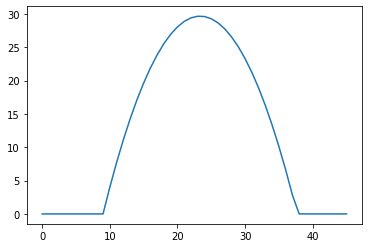

In [7]:
# get the lifespan for T from 0°C to 45°C for plotting
lifespan =[]
for i in range(0, 46):
    x = quadratic_function(q=(1.44*(10**(-1))), T=i, Tmin=9, Tmax=37.7)
    lifespan.append(x)
# replace negative values with 0
lifespan = pd.Series(lifespan)
lifespan = lifespan.clip(lower=0)
# plot
plt.plot(lifespan);

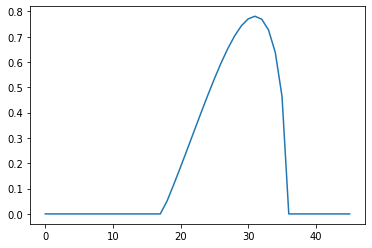

In [8]:
# get the transmission probability (A. aegypti) for T from 0°C to 45°C for plotting
transmission_aegypti = []
for i in range(0, 46):
    x = briere_function(q=(8.33*(10**(-4))), T=i, Tmin=17.2, Tmax=35.8)
    transmission_aegypti.append(x)
# replace negative values with 0
transmission_aegypti = pd.Series(transmission_aegypti)
transmission_aegypti = transmission_aegypti.clip(lower=0)
# plot
plt.plot(transmission_aegypti)

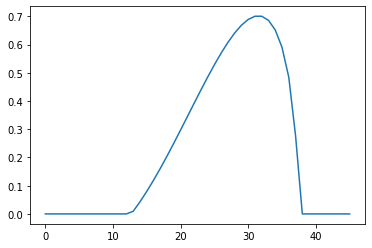

In [9]:
# get the infection probability (A. aegypti) for T from 0°C to 45°C for plotting
infection_aegypti = []
for i in range(0, 46):
    x = briere_function(q=(4.88*(10**(-4))), T=i, Tmin=12.7, Tmax=37.4)
    infection_aegypti.append(x)
# replace negative values with 0
infection_aegypti = pd.Series(infection_aegypti)
infection_aegypti = infection_aegypti.clip(lower=0)
# plot
plt.plot(infection_aegypti);

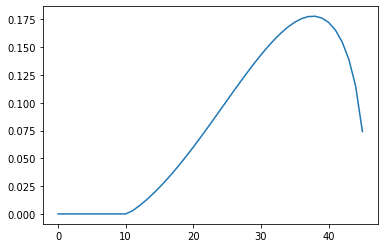

In [10]:
# get the Mosquito Dev. Rate (MDR) for T from 0°C to 45°C for plotting
pdr =[]
for i in range(0, 46):
    x = briere_function(q=(6.13*(10**(-5))), T=i, Tmin=10.3, Tmax=45.6)
    pdr.append(x)
# replace negative values with 0
pdr = pd.Series(pdr)
pdr = pdr.clip(lower=0)
# plot
plt.plot(pdr);

## Plot all functions together

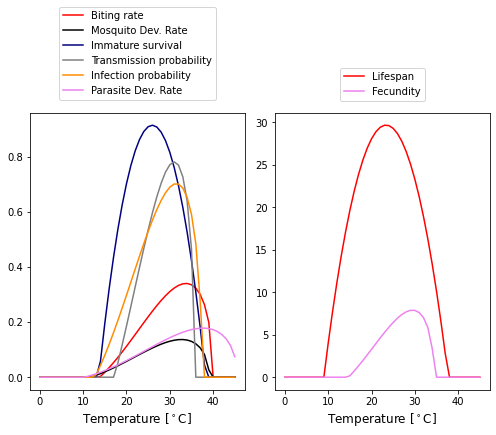

In [85]:
# plot all max<1 together
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 6), tight_layout=True)

ax[0].plot(biting_rate, color='red');
ax[0].plot(mdr, color='black');
ax[0].plot(immature_survival, color='navy');
ax[0].plot(transmission_aegypti, color='gray');
#ax.plot(transmission_albopictus);
ax[0].plot(infection_aegypti, color='darkorange');
#ax.plot(infection_albopictus);
ax[0].plot(pdr, color='violet');

ax[0].set_ylabel('')
ax[0].set_xlabel(r'Temperature [$^\circ$C]', fontsize=12)
ax[0].tick_params(labelsize=10)
ax[0].legend(labels=['Biting rate', 'Mosquito Dev. Rate', 'Immature survival', 'Transmission probability', 
                  'Infection probability', 'Parasite Dev. Rate'],
             bbox_to_anchor=(0.5, 1.4), loc='upper center')

ax[1].plot(lifespan, color='red');
ax[1].plot(fecundity, color='violet');

ax[1].set_ylabel('')
ax[1].set_xlabel(r'Temperature [$^\circ$C]', fontsize=12)
ax[1].tick_params(labelsize=10)
ax[1].legend(labels=['Lifespan', 'Fecundity'],
             bbox_to_anchor=(0.5, 1.18), loc='upper center')

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/additional_T.png', facecolor='white', dpi=200)